# Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def g_function_poisson(d, intensity):
    g=1-np.exp(-intensity*np.pi*d*d)
    return pd.DataFrame({"D":d, "G":g})

def f_function_poisson(d, intensity):
    g=1-np.exp(-intensity*np.pi*d*d)
    return pd.DataFrame({"D":d, "F":g})

Kraj=gpd.read_file("Kraj.zip")
points_1=gpd.read_file("points_1.zip")
points_2=gpd.read_file("points_2.zip")
points_3=gpd.read_file("points_3.zip")

int_1=(points_1.geometry.x.size/Kraj.geometry.area)[0]
int_2=(points_2.geometry.x.size/Kraj.geometry.area)[0]
int_3=(points_3.geometry.x.size/Kraj.area)[0]

Funkcja G

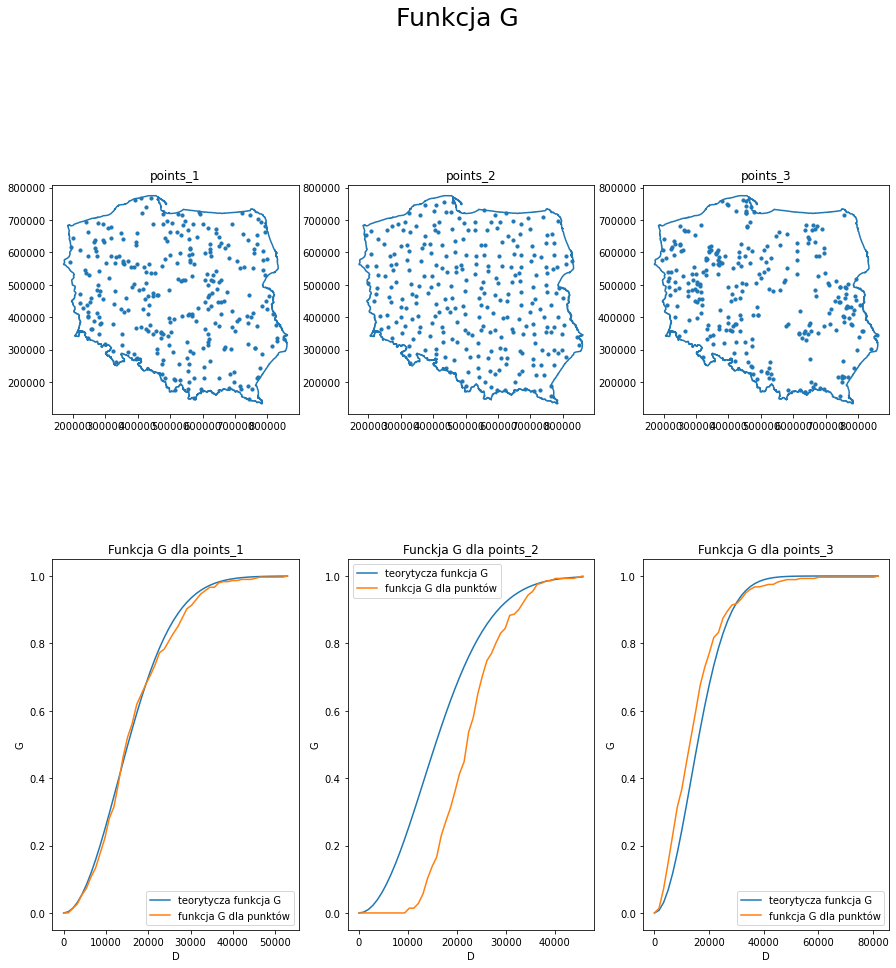

In [3]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
    coord = pd.DataFrame(data={"X":points.geometry.x, "Y":points.geometry.y})
    G, D = pp.distance_statistics.g(coord, support=intervals)
    return pd.DataFrame(data={"D":G, "G":D})

p_g_1 = g_function(points_1,50)
p_g_2 = g_function(points_2,50)
p_g_3 = g_function(points_3,50)

p_g_t_1 = g_function_poisson(p_g_1["D"], int_1)
p_g_t_2 = g_function_poisson(p_g_2["D"], int_2)
p_g_t_3 = g_function_poisson(p_g_3["D"], int_3)

fig, ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle("Funkcja G", fontsize=25)
ax[0,0].set_title("points_1")
points_1.plot(ax=ax[0,0], markersize=10)
Kraj.boundary.plot(ax=ax[0,0])

ax[0,1].set_title("points_2")
points_2.plot(ax=ax[0,1],markersize=10)
Kraj.boundary.plot(ax=ax[0,1])

ax[0,2].set_title("points_3")
points_3.plot(ax=ax[0,2],markersize=10)
Kraj.boundary.plot(ax=ax[0,2])

ax[1,0].set_title("Funkcja G dla points_1")
sns.lineplot(data=p_g_t_1,x="D",y="G",ax=ax[1,0])
sns.lineplot(data=p_g_1,x="D",y="G",ax=ax[1,0])
ax[1,0].legend(["teorytycza funkcja G","funkcja G dla punktów"])

ax[1,1].set_title("Funckja G dla points_2")
sns.lineplot(data=p_g_t_2,x="D",y="G",ax=ax[1,1])
sns.lineplot(data=p_g_2,x="D",y="G",ax=ax[1,1])
ax[1,1].legend(["teorytycza funkcja G","funkcja G dla punktów"])

ax[1,2].set_title("Funkcja G dla points_3")
sns.lineplot(data=p_g_t_3,x="D",y="G",ax=ax[1,2])
sns.lineplot(data=p_g_3,x="D",y="G",ax=ax[1,2])
ax[1,2].legend(["teorytycza funkcja G","funkcja G dla punktów"])

Funkcja F

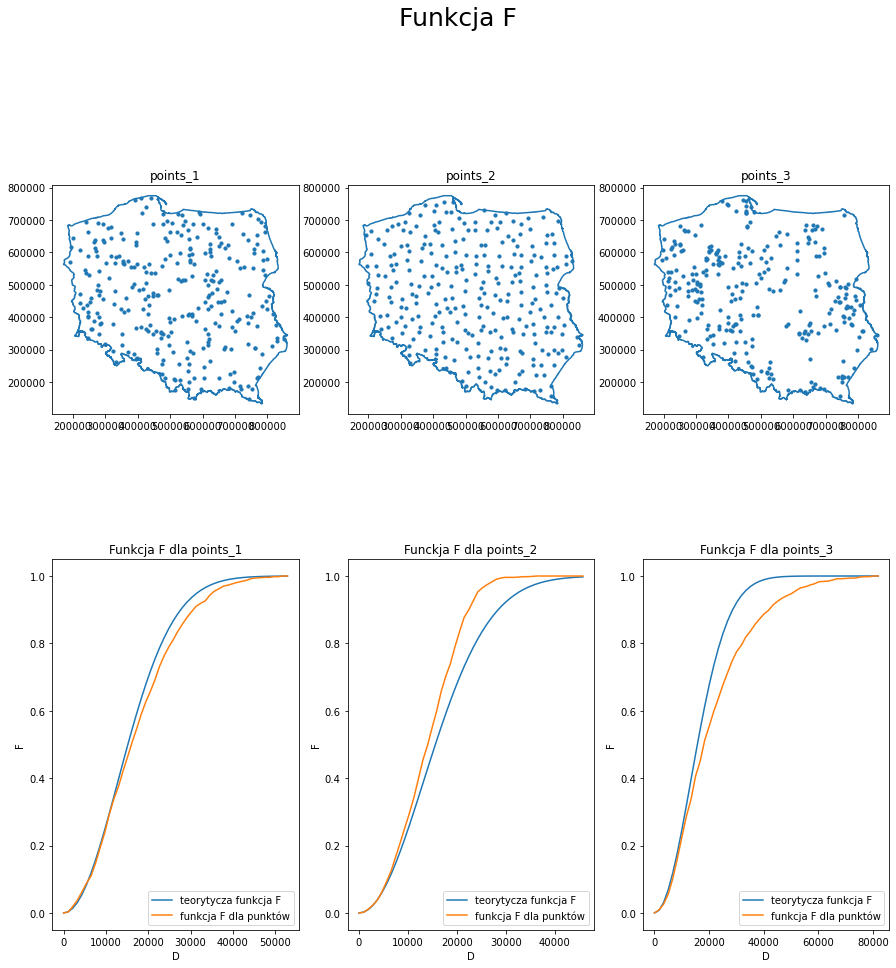

In [4]:
def f_function(points, intervals, polygon):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
        
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """
    p=pd.DataFrame({"X":points.geometry.x, "Y":points.geometry.y})
    t=pp.distance_statistics.f(coordinates=p,support=intervals,hull=polygon)
    return pd.DataFrame({"D":t[0], "F":t[1]})

p_f_1=f_function(points_1, 50, Kraj.geometry[0])
p_f_2=f_function(points_2, 50, Kraj.geometry[0])
p_f_3=f_function(points_3, 50, Kraj.geometry[0])

p_f_t_1=f_function_poisson(p_f_1["D"], int_1)
p_f_t_2=f_function_poisson(p_f_2["D"], int_2)
p_f_t_3=f_function_poisson(p_f_3["D"], int_3)

fig, ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle("Funkcja F", fontsize=25)
ax[0,0].set_title("points_1")
points_1.plot(ax=ax[0,0],markersize=10)
Kraj.boundary.plot(ax=ax[0,0])

ax[0,1].set_title("points_2")
points_2.plot(ax=ax[0,1],markersize=10)
Kraj.boundary.plot(ax=ax[0,1])

ax[0,2].set_title("points_3")
points_3.plot(ax=ax[0,2],markersize=10)
Kraj.boundary.plot(ax=ax[0,2])

ax[1,0].set_title("Funkcja F dla points_1")
sns.lineplot(data=p_f_t_1,x="D",y="F",ax=ax[1,0])
sns.lineplot(data=p_f_1,x="D",y="F",ax=ax[1,0])
ax[1,0].legend(["teorytycza funkcja F","funkcja F dla punktów"])

ax[1,1].set_title("Funckja F dla points_2")
sns.lineplot(data=p_f_t_2,x="D",y="F",ax=ax[1,1])
sns.lineplot(data=p_f_2,x="D",y="F",ax=ax[1,1])
ax[1,1].legend(["teorytycza funkcja F","funkcja F dla punktów"])

ax[1,2].set_title("Funkcja F dla points_3")
sns.lineplot(data=p_f_t_3,x="D",y="F",ax=ax[1,2])
sns.lineplot(data=p_f_3,x="D",y="F",ax=ax[1,2])
ax[1,2].legend(["teorytycza funkcja F","funkcja F dla punktów"])  

Analiza Monte-Carlo na przykładzie funkcji G

H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05


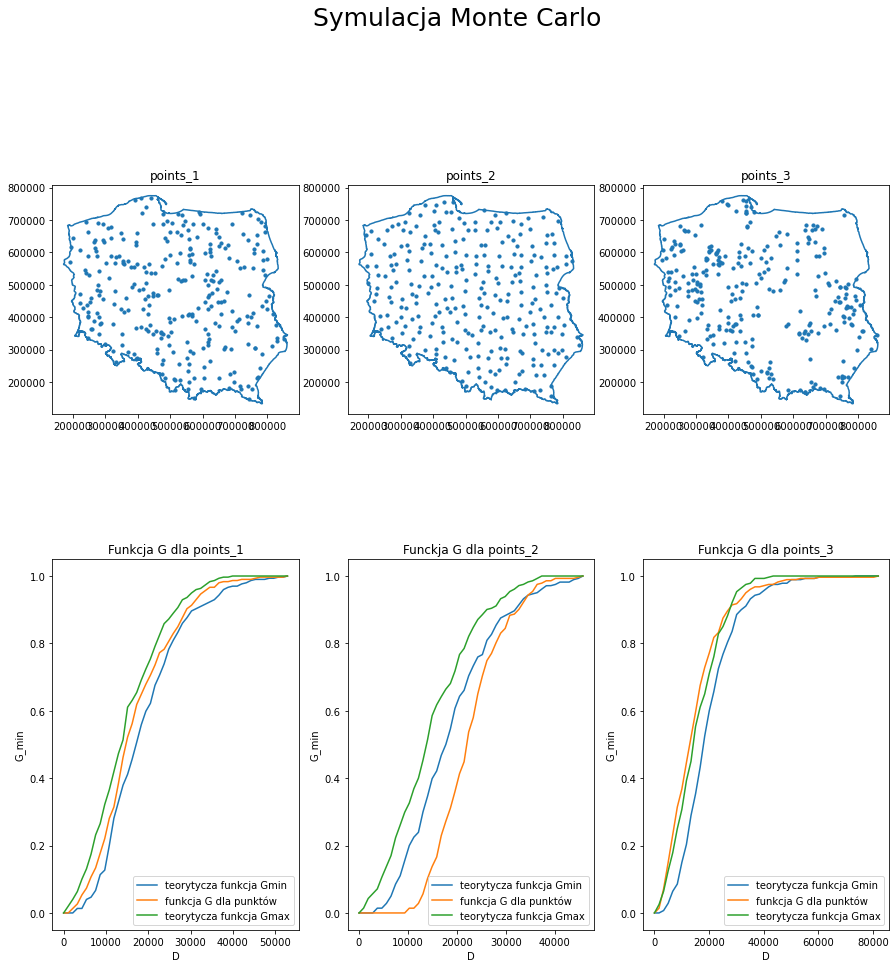

In [5]:
def g_test_mc(points, intervals, polygon, number_of_simulations):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do największej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
    number_of_simulations: int
        Liczba dodania określająca liczbę wykonywanych symulacji.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
        - "G_min" - zawierającą dolne wartości obwiedni funkcji G.
        - "G_max" - zawierającą górne wartości obwiedni funkcji G.
    """  
    p=pd.DataFrame({"X":points.geometry.x, "Y":points.geometry.y})
    t=pp.distance_statistics.g_test(coordinates=p,support=intervals, hull=polygon, n_simulations=number_of_simulations, keep_simulations=True)
    gmin=t[3].min(axis=0)
    gmax=t[3].max(axis=0)
    print("H0: Testowana zmienna ma jednorodny rozkład losowy Poissona")
    print("H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona")
    if(all(t[1]<=gmax) and all(t[1]>=gmin)):
        print("Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05")
    else:
        print("Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05")
    return pd.DataFrame({"D":t[0], "G":t[1], "G_min":gmin, "G_max":gmax}) 

g_1=g_test_mc(points_1, 50, Kraj.geometry[0], 41)
g_2=g_test_mc(points_2, 50, Kraj.geometry[0], 41)
g_3=g_test_mc(points_3, 50, Kraj.geometry[0], 41)

fig, ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle("Symulacja Monte Carlo", fontsize=25)
ax[0,0].set_title("points_1")
points_1.plot(ax=ax[0,0],markersize=10)
Kraj.boundary.plot(ax=ax[0,0])

ax[0,1].set_title("points_2")
points_2.plot(ax=ax[0,1],markersize=10)
Kraj.boundary.plot(ax=ax[0,1])

ax[0,2].set_title("points_3")
points_3.plot(ax=ax[0,2],markersize=10)
Kraj.boundary.plot(ax=ax[0,2])

ax[1,0].set_title("Funkcja G dla points_1")
sns.lineplot(data=g_1,x="D",y="G_min",ax=ax[1,0])
sns.lineplot(data=g_1,x="D",y="G",ax=ax[1,0])
sns.lineplot(data=g_1,x="D",y="G_max",ax=ax[1,0])
ax[1,0].legend(["teorytycza funkcja Gmin","funkcja G dla punktów","teorytycza funkcja Gmax"])

ax[1,1].set_title("Funckja G dla points_2")
sns.lineplot(data=g_2,x="D",y="G_min",ax=ax[1,1])
sns.lineplot(data=g_2,x="D",y="G",ax=ax[1,1])
sns.lineplot(data=g_2,x="D",y="G_max",ax=ax[1,1])
ax[1,1].legend(["teorytycza funkcja Gmin","funkcja G dla punktów","teorytycza funkcja Gmax"])

ax[1,2].set_title("Funkcja G dla points_3")
sns.lineplot(data=g_3,x="D",y="G_min",ax=ax[1,2])
sns.lineplot(data=g_3,x="D",y="G",ax=ax[1,2])
sns.lineplot(data=g_3,x="D",y="G_max",ax=ax[1,2])
ax[1,2].legend(["teorytycza funkcja Gmin","funkcja G dla punktów","teorytycza funkcja Gmax"])